# Klasyfikacja niezbalansowana i anomaly detection

Poza standardowymi narzƒôdziami do klasyfikacji tabelarycznej u≈ºyjemy bibliotek:
1. [Imbalanced-learn](https://imbalanced-learn.org/stable/index.html) - biblioteka implementujƒÖca r√≥≈ºne algorytmy undersamplingu i oversamplingu
2. [PyOD](https://pyod.readthedocs.io/en/latest/index.html) - biblioteka implementujƒÖca mn√≥stwo algorytm√≥w outlier detection
3. [XGBoost](https://xgboost.readthedocs.io/en/stable/) - oficjalna implementacja algorytmu XGBoost

In [68]:
import pandas as pd

## Klasyfikacja umiarkowanie niezbalansowana

Najpierw wykorzystamy zbi√≥r danych [Polish companies bankruptcy](https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data). Dotyczy on klasyfikacji, na podstawie danych z raport√≥w finansowych, czy firma zbankrutuje w ciƒÖgu najbli≈ºszych kilku lat. Jest to zadanie szczeg√≥lnie istotne dla bank√≥w, funduszy inwestycyjnych, firm ubezpieczeniowych itp., kt√≥re z tego powodu zatrudniajƒÖ licznie data scientist√≥w. Zbi√≥r zawiera 64 cechy, obliczone przez ekonomist√≥w, kt√≥rzy stworzyli ten zbi√≥r, opisane na stronie UCI.

Wykorzystamy podzbi√≥r, w kt√≥rym na podstawie finansowych firmy po 3 latach monitorowania chcemy przewidywaƒá, czy firma zbankrutuje w ciƒÖgu najbli≈ºszych 3 lat. Jest to do≈õƒá realistyczny horyzont czasowy, a przy tym najwiƒôkszy z podzbior√≥w.

In [2]:
from scipy.io import arff

data = arff.loadarff("polish_companies_bankruptcy_3_year_data.arff")

df = pd.DataFrame(data[0])
y = df.pop("class").astype(int)

df.head()

Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7   Attr8  \
0  0.174190  0.41299  0.14371  1.3480 -28.9820  0.60383  0.219460  1.1225   
1  0.146240  0.46038  0.28230  1.6294   2.5952  0.00000  0.171850  1.1721   
2  0.000595  0.22612  0.48839  3.1599  84.8740  0.19114  0.004572  2.9881   
3  0.024526  0.43236  0.27546  1.7833 -10.1050  0.56944  0.024526  1.3057   
4  0.188290  0.41504  0.34231  1.9279 -58.2740  0.00000  0.233580  1.4094   

    Attr9   Attr10  ...    Attr55    Attr56    Attr57   Attr58    Attr59  \
0  1.1961  0.46359  ...  127280.0  0.163960  0.375740  0.83604  0.000007   
1  1.6018  0.53962  ...    3387.8  0.027516  0.271000  0.90108  0.000000   
2  1.0077  0.67566  ...   20453.0  0.007639  0.000881  0.99236  0.000000   
3  1.0509  0.56453  ...    5012.6  0.048398  0.043445  0.95160  0.142980   
4  1.3393  0.58496  ...   13730.0  0.176480  0.321880  0.82635  0.073039   

   Attr60  Attr61   Attr62  Attr63  Attr64  
0  9.7145  6.2813   84.291  4.3303  4.0341  
1  5.9882  4.1103  102.190  3.5716  5.9500  
2  6.7742  3.7922   64.846  5.6287  4.4581  
3  4.2286  5.0528   98.783  3.6950  3.4844  
4  2.5912  7.0756  100.540  3.6303  4.6375  

[5 rows x 64 columns]

**Zadanie 1 (1 punkt)**

1. Zwizualizuj brakujƒÖce ilo≈õƒá brakujƒÖcych danych na wykresie s≈Çupkowym (bar plot).
2. Zwizualizuj rozk≈Çad klas na wykresie.
3. Usu≈Ñ cechƒô `Attr37`, majƒÖcƒÖ du≈ºo warto≈õci brakujƒÖcych.
4. Dokonaj podzia≈Çu na zbi√≥r treningowy i testowy w proporcjach 75%-25%, ze stratyfikacjƒÖ. Pamiƒôtaj o `random_state=0`.
5. Zbuduj i zastosuj pipeline (`make_pipeline`) do czyszczenia danych, sk≈ÇadajƒÖcy siƒô z:
   - uzupe≈Çnienia warto≈õci brakujƒÖcych warto≈õciƒÖ ≈õredniƒÖ (`SimpleImputer`)
   - standaryzacji danych (`StandardScaler`)

<Axes: title={'center': 'Missing values per column'}, xlabel='Columns', ylabel='Count of missing'>

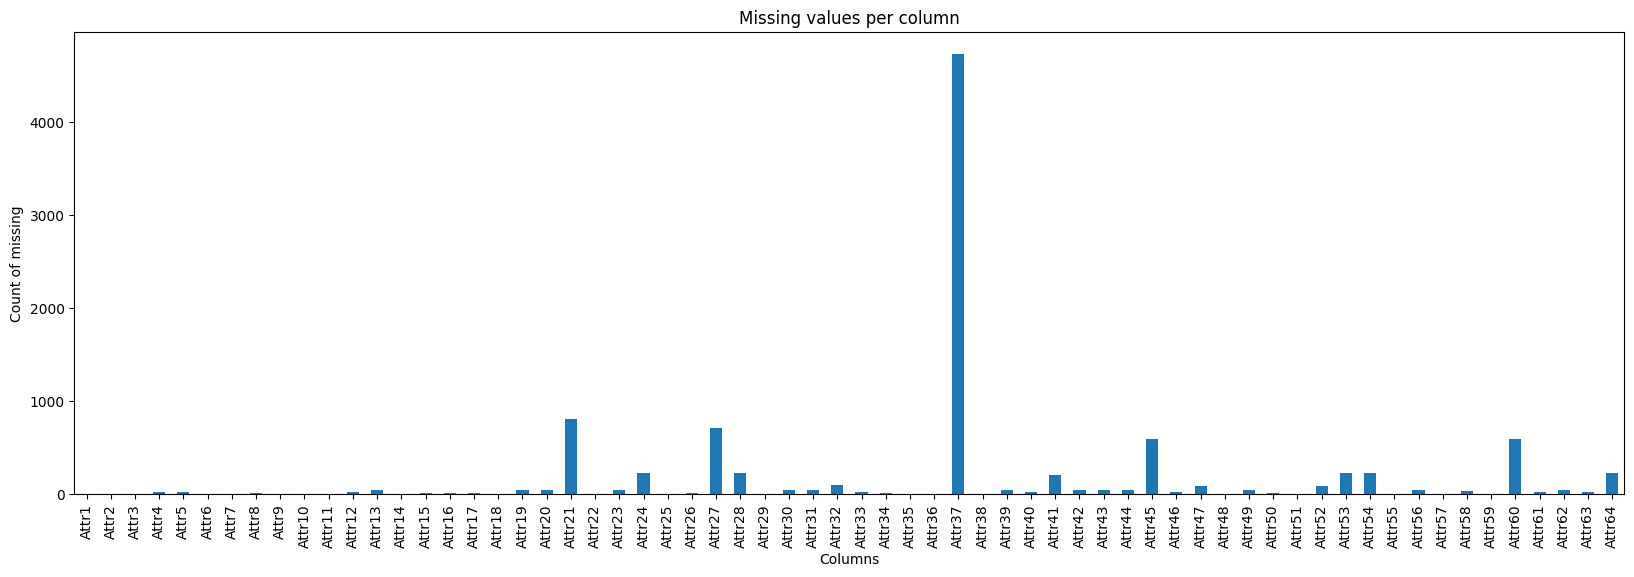

In [5]:
missing = df.isna().sum()

missing.plot.bar(
    figsize=(20, 6),
    xlabel="Columns",
    ylabel="Count of missing",
    title="Missing values per column",
    rot=90,
)

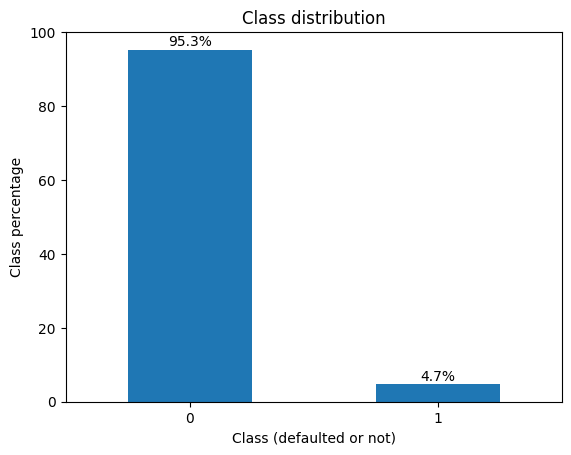

In [6]:
import matplotlib.pyplot as plt

class_counts = y.value_counts(normalize=True) * 100
bar = class_counts.plot.bar(
    title="Class distribution",
    rot=0,
    xlabel="Class (defaulted or not)",
    ylabel="Class percentage",
)

for i, v in enumerate(class_counts):
    bar.text(i, v + 1, f"{v:.1f}%", ha="center", fontsize=10)

plt.show()

In [7]:
df.drop(columns=["Attr37"])

Attr1    Attr2     Attr3    Attr4     Attr5     Attr6     Attr7  \
0      0.174190  0.41299  0.143710  1.34800  -28.9820  0.603830  0.219460   
1      0.146240  0.46038  0.282300  1.62940    2.5952  0.000000  0.171850   
2      0.000595  0.22612  0.488390  3.15990   84.8740  0.191140  0.004572   
3      0.024526  0.43236  0.275460  1.78330  -10.1050  0.569440  0.024526   
4      0.188290  0.41504  0.342310  1.92790  -58.2740  0.000000  0.233580   
...         ...      ...       ...      ...       ...       ...       ...   
10498  0.002861  0.58067 -0.223860  0.51658  -31.8660  0.002861  0.002861   
10499 -0.051968  0.55254  0.147150  2.16980   12.7480 -0.051968 -0.034361   
10500 -0.135900  0.83954 -0.342010  0.46526 -145.3100 -0.219120 -0.131860   
10501  0.009423  0.50028  0.261630  1.52300  -10.1580  0.009423  0.007700   
10502 -0.001775  0.94780  0.003729  1.00450  -50.2210  0.000000  0.002565   

          Attr8    Attr9    Attr10  ...    Attr55    Attr56    Attr57  \
0      1.122500  1.19610  0.463590  ...  127280.0  0.163960  0.375740   
1      1.172100  1.60180  0.539620  ...    3387.8  0.027516  0.271000   
2      2.988100  1.00770  0.675660  ...   20453.0  0.007639  0.000881   
3      1.305700  1.05090  0.564530  ...    5012.6  0.048398  0.043445   
4      1.409400  1.33930  0.584960  ...   13730.0  0.176480  0.321880   
...         ...      ...       ...  ...       ...       ...       ...   
10498  0.618550  1.01200  0.359170  ...   -4321.5  0.011834  0.007966   
10499  0.669830  0.94694  0.370110  ...   13488.0 -0.056037 -0.140410   
10500  0.191130  1.09990  0.160460  ...   -4233.0  0.144120 -0.846930   
10501  0.989900  1.01230  0.495230  ...    2686.9  0.012186  0.019027   
10502  0.055122  2.12680  0.052245  ...       5.0  0.023492 -0.033971   

        Attr58    Attr59   Attr60   Attr61   Attr62   Attr63   Attr64  
0      0.83604  0.000007   9.7145   6.2813   84.291   4.3303   4.0341  
1      0.90108  0.000000   5.9882   4.1103  102.190   3.5716   5.9500  
2      0.99236  0.000000   6.7742   3.7922   64.846   5.6287   4.4581  
3      0.95160  0.142980   4.2286   5.0528   98.783   3.6950   3.4844  
4      0.82635  0.073039   2.5912   7.0756  100.540   3.6303   4.6375  
...        ...       ...      ...      ...      ...      ...      ...  
10498  0.98817  0.327360  38.1420  39.1500   42.202   8.6489   5.2646  
10499  1.05600  1.153000  14.4930   9.2851   32.761  11.1410   1.9276  
10500  0.85427  0.814200   6.2737   9.6966  212.230   1.7198   1.5659  
10501  0.98781  0.000000   5.9675   4.3536   98.240   3.7154   7.8068  
10502  0.97208  2.398500   7.5512   3.9960  141.160   2.5857  12.2250  

[10503 rows x 63 columns]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.25, stratify=y, random_state=0
)

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(SimpleImputer(), StandardScaler())
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

In [4]:
from scipy.io import arff

data = arff.loadarff("polish_companies_bankruptcy_3_year_data.arff")

df = pd.DataFrame(data[0])
y = df.pop("class").astype(int)

df.head()

Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7   Attr8  \
0  0.174190  0.41299  0.14371  1.3480 -28.9820  0.60383  0.219460  1.1225   
1  0.146240  0.46038  0.28230  1.6294   2.5952  0.00000  0.171850  1.1721   
2  0.000595  0.22612  0.48839  3.1599  84.8740  0.19114  0.004572  2.9881   
3  0.024526  0.43236  0.27546  1.7833 -10.1050  0.56944  0.024526  1.3057   
4  0.188290  0.41504  0.34231  1.9279 -58.2740  0.00000  0.233580  1.4094   

    Attr9   Attr10  ...    Attr55    Attr56    Attr57   Attr58    Attr59  \
0  1.1961  0.46359  ...  127280.0  0.163960  0.375740  0.83604  0.000007   
1  1.6018  0.53962  ...    3387.8  0.027516  0.271000  0.90108  0.000000   
2  1.0077  0.67566  ...   20453.0  0.007639  0.000881  0.99236  0.000000   
3  1.0509  0.56453  ...    5012.6  0.048398  0.043445  0.95160  0.142980   
4  1.3393  0.58496  ...   13730.0  0.176480  0.321880  0.82635  0.073039   

   Attr60  Attr61   Attr62  Attr63  Attr64  
0  9.7145  6.2813   84.291  4.3303  4.0341  
1  5.9882  4.1103  102.190  3.5716  5.9500  
2  6.7742  3.7922   64.846  5.6287  4.4581  
3  4.2286  5.0528   98.783  3.6950  3.4844  
4  2.5912  7.0756  100.540  3.6303  4.6375  

[5 rows x 64 columns]

Standaryzacja by≈Ça szczeg√≥lnie wa≈ºna, bo metody undersamplingu i oversamplingu sƒÖ oparte o najbli≈ºszych sƒÖsiad√≥w.

## Cost-sensitive learning i threshold tuning

Jako naszego algorytmu u≈ºyjemy lasu losowego (Random Forest). Dla przypomnienia, jest on oparty o **uczenie zespo≈Çowe (ensemble learning)**, w kt√≥rym u≈õredniamy decyzje wielu klasyfikator√≥w bazowych. SƒÖ to drzewa decyzyjne. Losujemy w nim **pr√≥bki bootstrapowe (bootstrap samples)**, czyli losujemy z powt√≥rzeniami tyle punkt√≥w, ile wynosi rozmiar naszego zbioru. Dla ka≈ºdej losujemy tak≈ºe podzbi√≥r cech, typowo tyle, ile wynosi pierwiastek kwadratowy z liczby wszystkich cech. Nastƒôpnie trenujemy drzewa decyzyjne na takich wylosowanych podzbiorach. Decyzja klasyfikatora jest podejmowana przez g≈Çosowanie drzew (w klasyfikacji) lub ich u≈õrednienie (w regresji).

W wielu zastosowaniach du≈ºƒÖ zaletƒÖ las√≥w losowych jest ich niska podatno≈õƒá na tuning hiperparametr√≥w, tzw. **tunability**. Algorytmy o wysokim tunability (np. SVM) sƒÖ podatne na dob√≥r hiperparametr√≥w i wymagajƒÖ jego zastosowania, ≈ºeby osiƒÖgnƒÖƒá dobre wyniki. Random Forest dzia≈Ça typowo doskonale z domy≈õlnymi hiperparametrami, co najwy≈ºej warto czasem ustawiƒá wiƒôkszƒÖ liczbƒô drzew, ni≈º domy≈õlna. Ciekawe artyku≈Çy w tej kwestii to:

> Probst, Philipp, Anne-Laure Boulesteix, and Bernd Bischl. *"Tunability: Importance of hyperparameters of machine learning algorithms."* The Journal of Machine Learning Research 20.1 (2019): 1934-1965. [link](https://www.jmlr.org/papers/volume20/18-444/18-444.pdf)

> Probst, Philipp, Marvin N. Wright, and Anne‚ÄêLaure Boulesteix. *"Hyperparameters and tuning strategies for random forest."* Wiley Interdisciplinary Reviews: data mining and knowledge discovery 9.3 (2019): e1301. [link](https://arxiv.org/pdf/1804.03515.pdf)

Dziƒôki wykorzystaniu Random Forest zasadniczo nie bƒôdziemy potrzebowaƒá tuningu hiperparametr√≥w dla klasyfikatora. Nadaje siƒô te≈º dobrze do klasyfikacji niezbalansowanej: drzewa decyzyjne ≈Çatwo integrujƒÖ wa≈ºenie klas w proces treningu, a u≈õrednianie decyzji mocno zmniejsza wariancjƒô b≈Çƒôdu.

Ze wzglƒôdu na niezbalansowanie zbioru, kt√≥re jest znaczƒÖce, ale nie ekstremalne, wykorzystamy dwie metryki: AUROC oraz F1-score. Ta druga bƒôdzie przydatna przy **threshold tuningu**.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

clf_rf = RandomForestClassifier(random_state=0, n_jobs=-1)
clf_rf.fit(X_train, y_train)

y_pred = clf_rf.predict(X_test)
y_pred_score = clf_rf.predict_proba(X_test)[:, 1]

auroc = roc_auc_score(y_test, y_pred_score)
f1 = f1_score(y_test, y_pred)

print(f"AUROC: {100 * auroc:.2f}%")
print(f"F1-score: {100 * f1:.2f}%")

AUROC: 88.56%
F1-score: 38.75%


AUROC wydaje siƒô niez≈Çe, ale F1-score pozostawia wiele do ≈ºyczenia. Zobaczmy, czy **cost-sensitive learning** co≈õ zmieni. Skorzystamy z domy≈õlnej heurystyki do wa≈ºenia klas `"balanced"`.

In [11]:
clf_rf_csl = RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1)
clf_rf_csl.fit(X_train, y_train)

y_pred = clf_rf_csl.predict(X_test)
y_pred_score = clf_rf_csl.predict_proba(X_test)[:, 1]

auroc = roc_auc_score(y_test, y_pred_score)
f1 = f1_score(y_test, y_pred)

print(f"AUROC: {100 * auroc:.2f}%")
print(f"F1-score: {100 * f1:.2f}%")

AUROC: 89.38%
F1-score: 29.33%


Jedna metryka ro≈õnie, druga maleje - tak te≈º siƒô mo≈ºe zdarzyƒá. Takie sytuacje sƒÖ zawsze ciekawe, bo pokazujƒÖ r√≥≈ºne aspekty tego, jak radzi sobie nasz klasyfikator. F1-score ≈ÇƒÖczy precyzjƒô i czu≈Ço≈õƒá, wiƒôc warto przeanalizowaƒá to g≈Çƒôbiej.

In [12]:
from sklearn.metrics import precision_score, recall_score

print("RF")
rf_precision = precision_score(y_test, clf_rf.predict(X_test))
rf_recall = recall_score(y_test, clf_rf.predict(X_test))
print(f"  Precision: {100 * rf_precision:.2f}%")
print(f"  Recall: {100 * rf_recall:.2f}%")

print()

print("RF with cost-sensitive learning")
rf_csl_precision = precision_score(y_test, clf_rf_csl.predict(X_test))
rf_csl_recall = recall_score(y_test, clf_rf_csl.predict(X_test))
print(f"  Precision: {100 * rf_csl_precision:.2f}%")
print(f"  Recall: {100 * rf_csl_recall:.2f}%")

RF
  Precision: 86.11%
  Recall: 25.00%

RF with cost-sensitive learning
  Precision: 84.62%
  Recall: 17.74%


Z cost-sensitive learningiem predykcje prawdopodobie≈Ñstwa co prawda sƒÖ lepsze (bo mamy wy≈ºszy AUROC), ale i precyzja, i czu≈Ço≈õƒá spad≈Çy. No i w obu przypadkach mamy naprawdƒô niski recall!

Co≈õ trzeba z tym zrobiƒá. Skoro F1-score to metryka binarna, to naj≈Çatwiej zmieniƒá pr√≥g klasy pozytywnej, czyli zrobiƒá threshold tuning.

**Zadanie 2 (1.5 punktu)**

Zaimplementuj threshold tuning z pomocƒÖ walidacji skro≈õnej. Skorzystaj z funkcji `thresholded_f1_score()`, kt√≥ra jest gotowƒÖ metrykƒÖ, obliczajƒÖcƒÖ F1-score dla podanych prawdopodobie≈Ñstw klasy pozytywnej i progu klasyfikacji.

1. Stw√≥rz listƒô prog√≥w [0.1, 0.15, 0.2, .., 0.5]
2. Dla ka≈ºdego progu stw√≥rz nowy obiekt metryki z pomocƒÖ funkcji `make_scorer()`. Pamiƒôtaj, ≈ºe wiƒôksza warto≈õƒá jest lepsza i potrzebujemy prawdopodobie≈Ñstw. Trzeba te≈º podaƒá warto≈õƒá dla naszego progu (`threshold`) z pomocƒÖ `**kwargs`.
3. Oblicz wyniki walidacji skro≈õnej z pomocƒÖ funkcji `cross_val_score` dla Random Forest z cost-sensitive tuning. Wykorzystaj 5-fold CV. Funkcja ta zwraca wyniki dla wszystkich fold√≥w - oblicz ≈õredni wynik.
4. Zwizualizuj na wykresie wyniki F1-score dla poszczeg√≥lnych prog√≥w. Pamiƒôtaj o opisaniu osi i tytule wykresu.
5. Dla optymalnego progu oblicz i wypisz F1-score, precision i recall. Pr√≥g, dla kt√≥rego osiƒÖgniƒôto najwy≈ºszy F1-score, mo≈ºna ≈Çatwo wyciƒÖgnƒÖƒá z pomocƒÖ `np.argmax()`.
6. Skomentuj zmianƒô w precision i recall. Czy twoim zdaniem warto dokonaƒá takiej zmiany w przypadku tego zbioru, tj. przewidywania, czy sp√≥≈Çka zbankrutuje?

In [13]:
def thresholded_f1_score(y_true, y_score, threshold: float, **kwargs) -> float:
    y_pred = y_score >= threshold
    return f1_score(y_true, y_pred, **kwargs)

In [14]:
import numpy as np

thresholds = np.round(np.linspace(0.1, 0.5, num=9), 2)

<Axes: title={'center': 'Threshold tuning'}, xlabel='Threshold', ylabel='Mean F1-score (CV)'>

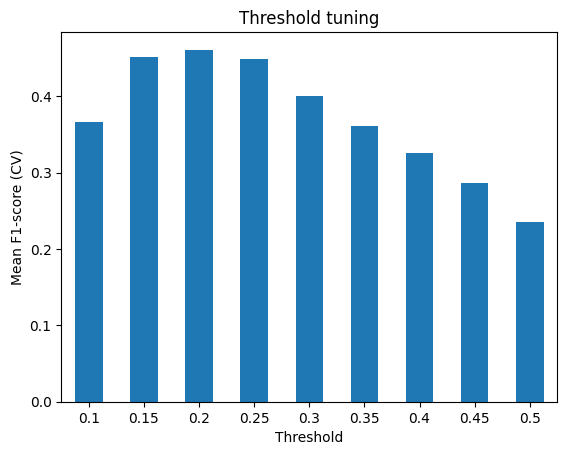

In [15]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

f1_scores = []
for threshold in thresholds:
    scorer = make_scorer(
        thresholded_f1_score, response_method="predict_proba", threshold=threshold
    )
    clf_rf_csl = RandomForestClassifier(
        class_weight="balanced", random_state=0, n_jobs=-1
    )
    scores = cross_val_score(
        clf_rf_csl, X_train, y_train, cv=5, n_jobs=-1, scoring=scorer
    )
    f1_scores.append(np.mean(scores))

s = pd.Series(data=f1_scores, index=thresholds)
s.plot.bar(
    title="Threshold tuning",
    rot=0,
    xlabel="Threshold",
    ylabel="Mean F1-score (CV)",
)

In [16]:
best_threshold = thresholds[np.argmax(f1_scores)]
clf_rf_csl_t = RandomForestClassifier(
    class_weight="balanced", random_state=0, n_jobs=-1
)
clf_rf_csl_t.fit(X_train, y_train)
y_pred = clf_rf_csl_t.predict_proba(X_test)[:, 1]

In [17]:
def thresholded_precision_score(y_true, y_score, threshold: float, **kwargs) -> float:
    y_pred = y_score >= threshold
    return precision_score(y_true, y_pred, **kwargs)


def thresholded_recall_score(y_true, y_score, threshold: float, **kwargs) -> float:
    y_pred = y_score >= threshold
    return recall_score(y_true, y_pred, **kwargs)

In [18]:
print("RF with threshold tuning")
rf_csl_precision_tuning = thresholded_precision_score(y_test, y_pred, best_threshold)
rf_csl_recall_tuning = thresholded_recall_score(y_test, y_pred, best_threshold)
f1_tuning = thresholded_f1_score(y_test, y_pred, best_threshold)
print(f"  F1-score: {100 * f1_tuning:.2f}%")
print(f"  Precision: {100 * rf_csl_precision_tuning:.2f}%")
print(f"  Recall: {100 * rf_csl_recall_tuning:.2f}%")

RF with threshold tuning
  F1-score: 47.75%
  Precision: 54.08%
  Recall: 42.74%


Jak widaƒá, zaszed≈Ç wyra≈∫ny trade-off miƒôdzy precision a recall. W por√≥wnaniu do RF z cost-sensitive learning
Recall wzr√≥s≈Ç o ok. 25%, co oznacza, ≈ºe model wykrywa znacznie wiƒôcej rzeczywistych przypadk√≥w bankructwa.
Precision spad≈Ço o ok. 30%, co przek≈Çada siƒô na wiƒôkszƒÖ liczbƒô fa≈Çszywych alarm√≥w.
Moim zdaniem w naszym przypadku warto zaakceptowaƒá wiƒôkszƒÖ liczbƒô fa≈Çszywych alarm√≥w dotyczƒÖcych potencjalnego bankructwa, zamiast przegapiƒá rzeczywistƒÖ niewyp≈Çacalno≈õƒá firmy.


## Undersampling, oversampling

Byƒá mo≈ºe klasa wiƒôkszo≈õciowa, kt√≥rej jest 95%, jest mocno zaszumiona i sƒÖ tam przyk≈Çady, kt√≥re warto by≈Çoby usunƒÖƒá. Czemu tak mo≈ºe byƒá?

Pamiƒôtajmy, ≈ºe klasa pozytywna to sp√≥≈Çki, kt√≥re zbankrutujƒÖ w ciƒÖgu najbli≈ºszych 3 lat. Przy granicy decyzyjnej w klasie dominujƒÖcej mogƒÖ byƒá na przyk≈Çad startupy o du≈ºym ryzyku, kt√≥re nie zbankrutowa≈Çy, ale by≈Ço to kwestiƒÖ dobrej koniunktury i szczƒô≈õliwego trafu tych sp√≥≈Çek. R√≥wnie dobrze mog≈Çyby upa≈õƒá przez niskie zasoby twarde czy rosnƒÖce koszty. Mo≈ºna je potraktowaƒá jak ma≈Ço miarodajny szum, kt√≥ry tylko z przyczyn do≈õƒá losowych nie sta≈Ç siƒô klasƒÖ pozytywnƒÖ (tj. sp√≥≈Çkami, kt√≥re zamknƒô≈Çy dzia≈Çalno≈õƒá).

Dla uproszczenia w tym i dalszych zadaniach skorzystamy z funkcji `assess_rf_performance()`, ≈ºeby ≈Çatwo sprawdzaƒá AUROC i F1-score klasyfikator√≥w.

Najpierw zastosujemy algorytm Edited Nearest Neighbors (ENN) z domy≈õlnymi parametrami: 
- `k=3`
- `kind_sel="all"` (wszyscy sƒÖsiedzi muszƒÖ byƒá z klasy dominujƒÖcej, aby punkt pozosta≈Ç w zbiorze)

Biblioteka imbalanced-learn opiera siƒô o metodƒô `.fit_resample()`, kt√≥ra zwraca zmodyfikowany zbi√≥r uczƒÖcy (z usuniƒôtymi/dodatkowymi pr√≥bkami). Implementuje tak≈ºe zmodyfikowany `Pipeline`, bo ten domy≈õlny ze Scikit-learn nie wspiera≈Çby takiej metody. Warto pamiƒôtaƒá o tym, ≈ºeby tworzyƒá nowe zmienne dla zmodyfikowanych zbior√≥w, bo inaczej trzeba by wykonywaƒá du≈ºe czƒô≈õci notebooka na nowo.

In [19]:
def assess_rf_performance(estimator: RandomForestClassifier, X_test, y_test) -> None:
    y_score = estimator.predict_proba(X_test)[:, 1]
    y_pred = estimator.predict(X_test)
    auroc = roc_auc_score(y_test, y_score)
    f1 = f1_score(y_test, y_pred)

    print(f"AUROC: {100 * auroc:.2f}%")
    print(f"F1-score: {100 * f1:.2f}%")

In [20]:
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours()
print(f"Samples before ENN: {len(X_train)}")
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)
print(f"Samples after ENN: {len(X_train_enn)}")

clf_rf_csl = RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1)
clf_rf_csl.fit(X_train_enn, y_train_enn)

assess_rf_performance(clf_rf_csl, X_test, y_test)

Samples before ENN: 7877
Samples after ENN: 7020
AUROC: 88.26%
F1-score: 30.46%


Wcze≈õniej AUROC wynosi≈Ço 89.30%, a F1-score 28.00%. Mamy spadek obu metryk - niedobrze! Usunƒôli≈õmy jednak oko≈Ço 10% zbioru, mo≈ºe to za du≈ºo?

**Zadanie 3 (1.5 punktu)**

1. Dokonaj tuningu hiperparametr√≥w ENN:
   - stw√≥rz siatkƒô hiperparametr√≥w: 
     - liczba sƒÖsiad√≥w: `[1, 3, 5]`
     - tryb wyboru punkt√≥w: `["all", "mode"]`
   - przed u≈ºyciem `GridSearchCV` stw√≥rz pipeline (ten z biblioteki imbalanced-learn), ≈ÇƒÖczƒÖcy ENN i Random Forest
   - wybierz klasyfikator o najwy≈ºszym AUROC
   - wykorzystaj 10-fold CV - przy zbiorach niezbalansowanych czƒôsto daje to dok≈Çadniejsze oszacowanie
   - pamiƒôtaj, ≈ºeby podaƒá, kt√≥rego elementu pipeline'u dotyczƒÖ hiperparametry w siatce (np. `enn__n_neighbors`)
2. Wypisz znalezione optymalne warto≈õci hiperparametr√≥w. Sprawd≈∫ wyniki na zbiorze testowym.
3. Czy usuwamy punkty agresywniej, czy bardziej konwerwatywnie? Zweryfikuj swojƒÖ intuicjƒô, sprawdzajƒÖc liczno≈õƒá zbioru przed i po zastosowaniu ENN z optymalnymi hiperparametrami.
4. Czy undersampling ostatecznie poprawi≈Ç wynik? Czy twoim zdaniem warto tu zastosowaƒá takƒÖ technikƒô?

In [21]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import EditedNearestNeighbours

pipe = Pipeline(
    [
        ("enn", EditedNearestNeighbours()),
        (
            "rf",
            RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1),
        ),
    ]
)
n_neighbors = [1, 3, 5]
kinds_sel = ["all", "mode"]

param_grid = {"enn__n_neighbors": n_neighbors, "enn__kind_sel": kinds_sel}
grid = GridSearchCV(pipe, param_grid, scoring="roc_auc", cv=10)
grid.fit(X_train, y_train)

print("Best ENN params:", grid.best_params_)
print("Best CV AUROC:", grid.best_score_)
best_pipe = grid.best_estimator_
enn = best_pipe.named_steps["enn"]
print(f"Samples before ENN: {len(X_train)}")
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)
print(f"Samples after ENN: {len(X_train_enn)}")

RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1)
clf_rf_csl.fit(X_train_enn, y_train_enn)

assess_rf_performance(clf_rf_csl, X_test, y_test)

Best ENN params: {'enn__kind_sel': 'all', 'enn__n_neighbors': 1}
Best CV AUROC: 0.8803173838706602
Samples before ENN: 7877
Samples after ENN: 7571
AUROC: 88.33%
F1-score: 31.37%


Warto≈õƒá F1-score wzros≈Ça natomiast warto≈õƒá AUROC ponownie spad≈Ça. Nasz ENN sta≈Ç siƒô bardziej konserwatywny zostawi≈Ç 550 pr√≥bek wiƒôcej. Podsumow√≥jƒÖc undersampling nie daje jaki≈õ wy≈õmienitych rezultat√≥w dla tego zbioru

Byƒá mo≈ºe oversampling da nam wiƒôksze korzy≈õci, w ko≈Ñcu klasy pozytywnej jest naprawdƒô ma≈Ço. Wypr√≥bujmy najpierw SMOTE z domy≈õlnymi hiperparametrami.

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
print(f"Samples before SMOTE: {len(X_train)}")
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"Samples after SMOTE: {len(X_train_smote)}")

clf_rf_csl = RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1)
clf_rf_csl.fit(X_train_smote, y_train_smote)

assess_rf_performance(clf_rf_csl, X_test, y_test)

Samples before SMOTE: 7877
Samples after SMOTE: 15012
AUROC: 88.81%
F1-score: 41.67%


Jest definitywnie lepiej! Liczba przyk≈Çad√≥w z klasy pozytywnej wzros≈Ça bardzo mocno, ale dziƒôki skalowalno≈õci lasu losowego nie jest to drastycznie odczuwalne. Za to F1-score bardzo wzr√≥s≈Ç, bo zwiƒôkszyli≈õmy znaczƒÖco wagƒô klasy mniejszo≈õciowej, i to zagƒôszczajƒÖc jƒÖ w przestrzeni zbioru danych. Dziƒôki temu i FP, i FN spadnƒÖ.

Imbalanced-learn domy≈õlnie generuje tyle klasy mniejszo≈õciowej, ≈ºeby by≈Ço jej tyle samo, co dominujƒÖcej. Prawie zawsze powoduje to overfitting - zweryfikujmy to.

In [23]:
print("Train metrics")
assess_rf_performance(clf_rf_csl, X_train, y_train)
print()
print("Test metrics")
assess_rf_performance(clf_rf_csl, X_test, y_test)

Train metrics
AUROC: 100.00%
F1-score: 100.00%

Test metrics
AUROC: 88.81%
F1-score: 41.67%


Jest to wrƒôcz tragiczny overfitting! Definitywnie trzeba tutaj tuningu. Imbalanced-learn pozwala na to poprzez parametr `sampling_strategy`. Je≈ºeli jest to liczba, to oznacza stosunek liczby przyk≈Çad√≥w klasy mniejszo≈õciowej do liczby przyk≈Çad√≥w klasy wiƒôkszo≈õciowej po oversamplingu.

Przyk≈Çadowo, domy≈õlne ustawienia odpowiadajƒÖ `sampling_strategy=1`, czyli:

$$\large
\frac{n_{minority}}{n_{majority}} = 1 \longrightarrow n_{minority} = n_{majority}
$$

≈ªeby zmniejszyƒá overfitting, trzeba generowaƒá mniej klasy pozytywnej, czyli zmniejszyƒá tƒô proporcjƒô. Dodatkowo mo≈ºemy zmieniƒá warto≈õƒá najbli≈ºszych sƒÖsiad√≥w - mniejsza liczba bƒôdzie skutkowaƒá generacjƒÖ bardziej wiernych lokalnie pr√≥bek, a wiƒôksza zwiƒôkszy r√≥≈ºnorodno≈õƒá.

**Zadanie 4 (2 punkty)**

Ze wzglƒôdu na koszt obliczeniowy po≈ÇƒÖczenia 10-fold CV i metod opartych o sƒÖsiedztwo mo≈ºna wykonaƒá **step-wise tuning**, w kt√≥rym robimy walidacjƒô skro≈õnƒÖ po kolei dla parametr√≥w, zamiast sprawdzaƒá wszystkie kombinacje po kolei. Nie daje to gwarancji optymalno≈õci, ale typowo dzia≈Ça bardzo dobrze, a przy tym jest du≈ºo szybsze. Jest to typowo stosowane w boostingu, kt√≥ry ma bardzo du≈ºo hiperparametr√≥w, ale tak≈ºe przy innych kosztownych algorytmach. Dobrze opisuje to [ten artyku≈Ç](https://medium.com/optuna/lightgbm-tuner-new-optuna-integration-for-hyperparameter-optimization-8b7095e99258).

Dokonaj po kolei tuningu:
- liczby sƒÖsiad√≥w w SMOTE w zakresie `[1, 2, 3, 4, 5]`
- ilo≈õci klasy pozytywnej w zakresie od 0.25 do 1 z krokiem 0.25 (mo≈ºe siƒô przydaƒá `np.linspace()` albo  `np.arange()`)

Zwr√≥ƒá uwagƒô na:
- 10-fold CV
- ustawienie `random_state=0`
- przyda siƒô ustawiƒá `verbose=4`, ≈ºeby mieƒá logi z wykonania, bo bƒôdzie siƒô to chwilƒô liczyƒá

Sprawd≈∫ wyniki obu pipeline'√≥w (z osobna) na zbiorze treningowym oraz testowym. Wytrenuj tak≈ºe ≈ÇƒÖczny pipeline, wykorzystujƒÖc oba znalezione parametry naraz, i sprawd≈∫ jego wyniki.

Pamiƒôtaj, ≈ºe nie trzeba przetrenowywaƒá klasyfikator√≥w na finalnych hiperparametrach - obiekt `GridSearchCV` te≈º ma metodƒô `.predict()`, w kt√≥ryj pod spodem u≈ºyje modelu z najlepszymi znalezionymi warto≈õciami hiperparametr√≥w.

Skomentuj:
- czy wynik siƒô poprawi≈Ç?
- czy zmniejszono lub wyeliminowano overfitting w kt√≥rym≈õ przypadku?
- czy warto by≈Ço tune'owaƒá oba parametry?
- czy po≈ÇƒÖczenie parametr√≥w poprawi≈Ço wynik?

Oszacuj, ile wolniej wykonywa≈Çby siƒô grid search na pe≈Çnej, kwadratowej siatce hiperparametr√≥w. Oblicz liczbƒô modeli, kt√≥rƒÖ trzeba by wytrenowaƒá w obu przypadkach (step-wise oraz na pe≈Çnej siatce) przy 10-fold CV, i przyjmij sta≈Çy ≈õredni czas na jeden fold wed≈Çug log√≥w z treningu.

In [24]:
k_neighbors = [1, 2, 3, 4, 5]
sampling_strategy = np.arange(0.25, 1.01, 0.25)

pipe_1 = Pipeline(
    [
        ("smote", SMOTE(random_state=0)),
        (
            "rf",
            RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1),
        ),
    ]
)

param_grid_1 = {"smote__k_neighbors": k_neighbors}

grid_1 = GridSearchCV(pipe_1, param_grid_1, scoring="roc_auc", verbose=4, cv=10)

In [25]:
%%time
grid_1.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END .............smote__k_neighbors=1;, score=0.861 total time=   1.2s
[CV 2/10] END .............smote__k_neighbors=1;, score=0.868 total time=   1.3s
[CV 3/10] END .............smote__k_neighbors=1;, score=0.833 total time=   1.2s
[CV 4/10] END .............smote__k_neighbors=1;, score=0.880 total time=   1.2s
[CV 5/10] END .............smote__k_neighbors=1;, score=0.895 total time=   1.3s
[CV 6/10] END .............smote__k_neighbors=1;, score=0.882 total time=   1.2s
[CV 7/10] END .............smote__k_neighbors=1;, score=0.908 total time=   1.2s
[CV 8/10] END .............smote__k_neighbors=1;, score=0.903 total time=   1.1s
[CV 9/10] END .............smote__k_neighbors=1;, score=0.846 total time=   1.0s
[CV 10/10] END ............smote__k_neighbors=1;, score=0.851 total time=   1.1s
[CV 1/10] END .............smote__k_neighbors=2;, score=0.855 total time=   1.2s
[CV 2/10] END .............smote__k_neighbors=2;

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=0)),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=-1,
                                                               random_state=0))]),
             param_grid={'smote__k_neighbors': [1, 2, 3, 4, 5]},
             scoring='roc_auc', verbose=4)

In [26]:
print("Best SMOTE params:", grid_1.best_params_)
print("Best CV AUROC:", grid_1.best_score_)
best_pipe_1 = grid_1.best_estimator_
smote_1 = best_pipe_1.named_steps["smote"]
print(f"Samples before SMOTE: {len(X_train)}")
X_train_smote, y_train_smote = smote_1.fit_resample(X_train, y_train)
print(f"Samples after SMOTE: {len(X_train_smote)}")

Best SMOTE params: {'smote__k_neighbors': 5}
Best CV AUROC: 0.8779811510368033
Samples before SMOTE: 7877
Samples after SMOTE: 15012


In [27]:
print("Train metrics")
assess_rf_performance(best_pipe_1, X_train_smote, y_train_smote)
print()
print("Test metrics")
assess_rf_performance(best_pipe_1, X_test, y_test)

Train metrics
AUROC: 100.00%
F1-score: 100.00%

Test metrics
AUROC: 88.81%
F1-score: 41.67%


In [28]:
best_k = grid_1.best_params_["smote__k_neighbors"]

pipe_2 = Pipeline(
    [
        ("smote", SMOTE(k_neighbors=best_k, random_state=0)),
        (
            "rf",
            RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1),
        ),
    ]
)

param_grid_2 = {"smote__sampling_strategy": sampling_strategy}

grid_2 = GridSearchCV(pipe_2, param_grid_2, scoring="roc_auc", verbose=4, cv=10)

In [29]:
%%time
grid_2.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END ....smote__sampling_strategy=0.25;, score=0.877 total time=   0.6s
[CV 2/10] END ....smote__sampling_strategy=0.25;, score=0.869 total time=   0.6s
[CV 3/10] END ....smote__sampling_strategy=0.25;, score=0.844 total time=   0.7s
[CV 4/10] END ....smote__sampling_strategy=0.25;, score=0.926 total time=   0.8s
[CV 5/10] END ....smote__sampling_strategy=0.25;, score=0.893 total time=   0.8s
[CV 6/10] END ....smote__sampling_strategy=0.25;, score=0.906 total time=   0.9s
[CV 7/10] END ....smote__sampling_strategy=0.25;, score=0.923 total time=   0.9s
[CV 8/10] END ....smote__sampling_strategy=0.25;, score=0.898 total time=   0.7s
[CV 9/10] END ....smote__sampling_strategy=0.25;, score=0.863 total time=   0.7s
[CV 10/10] END ...smote__sampling_strategy=0.25;, score=0.810 total time=   0.8s
[CV 1/10] END .....smote__sampling_strategy=0.5;, score=0.875 total time=   1.0s
[CV 2/10] END .....smote__sampling_strategy=0.5;

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=0)),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=-1,
                                                               random_state=0))]),
             param_grid={'smote__sampling_strategy': array([0.25, 0.5 , 0.75, 1.  ])},
             scoring='roc_auc', verbose=4)

In [30]:
print("Best SMOTE params:", grid_2.best_params_)
print("Best CV AUROC:", grid_2.best_score_)
best_pipe_2 = grid_2.best_estimator_
smote_2 = best_pipe_2.named_steps["smote"]
print(f"Samples before SMOTE: {len(X_train)}")
X_train_smote, y_train_smote = smote_2.fit_resample(X_train, y_train)
print(f"Samples after SMOTE: {len(X_train_smote)}")

Best SMOTE params: {'smote__sampling_strategy': np.float64(0.25)}
Best CV AUROC: 0.8809187975065962
Samples before SMOTE: 7877
Samples after SMOTE: 9382


In [31]:
print("Train metrics")
assess_rf_performance(best_pipe_2, X_train_smote, y_train_smote)
print()
print("Test metrics")
assess_rf_performance(best_pipe_2, X_test, y_test)

Train metrics
AUROC: 100.00%
F1-score: 100.00%

Test metrics
AUROC: 89.43%
F1-score: 40.68%


### 1. Czy wynik siƒô poprawi≈Ç
- Auroc wzros≈Ço o 0.6%
- F1-score spad≈Ço o 1%
### 2. Czy zmniejszono lub wyeliminowano overfitting?
- Nie overfitting nadal wystƒôpuje
### 3. Czy warto by≈Ço tune‚Äôowaƒá oba parametry?
- Pierwszego parametru nie warto by≈Ço trenowaƒá bo da≈Ç ustawienia domy≈õlne
- Drugiego w zasadzie te≈º bo jednƒÖ metrykƒô podni√≥s≈Ç minimalnie a drugƒÖ mocniej obni≈ºy≈Ç
### 4. Czy po≈ÇƒÖczenie parametr√≥w poprawi≈Ço wynik?
- Auroc wzros≈Ço o 0.6%
- F1-score spad≈Ço o 1%

// Obliczenia:
### 1. Step-wise
Dla naszego przypadku mamy nastƒôpujƒÖcƒÖ sytuacje:
* Pierwszy pipeline 10 fold√≥w ka≈ºdy sprawdza 5 warto≈õci czyli 50 estymator√≥w 
* Drugi pipeline 10 fold√≥w ka≈ºdy sprawdza 4 warto≈õci czyli 40 estymator√≥w

Za≈Ç√≥≈ºmy ≈ºe ka≈ºdy estymator ma sta≈Çy czas treningu t (oko≈Ço 1.1s)

Czyli nasz ca≈Çkowity czas to:
$$
50t + 40t = 90t \text{ (oko≈Ço 100 sekund)}
$$
---  
### 2. Full grid
Dla pe≈Çnej siatki mamy nastƒôpujƒÖcƒÖ sytuacjƒô:
* Zbiorczy pipeline 10 fold√≥w ka≈ºdy sprawdza 20 warto≈õci czyli 200 estymator√≥w
    
za≈Ç√≥≈ºmy ≈ºe ka≈ºdy estymator ma sta≈Çy czas treningu t (oko≈Ço 1.1s)

Czyli nasz ca≈Çkowity czas to:
$$
200t \text{ (oko≈Ço 220 sekund)}
$$
---
Por√≥wnujƒÖc te 2 warto≈õci:
$$
\frac{200t}{90t} \approx 2{,}22
$$
nasze podej≈õcie jest 2,2 raza szybsze

OstatniƒÖ rzeczƒÖ, kt√≥rƒÖ mo≈ºemy tu zrobiƒá, jest po≈ÇƒÖczenie naszych technik. Imbalanced-learn implementuje wygodne po≈ÇƒÖczenie oversamplingu z undersamplingu w module `combine`, np. klasƒÖ `SMOTEENN`.

In [32]:
from imblearn.combine import SMOTEENN

smote_enn_pipeline = Pipeline(
    [
        ("smoteenn", SMOTEENN(random_state=0)),
        (
            "rf",
            RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1),
        ),
    ]
)
smote_enn_pipeline.fit(X_train, y_train)

assess_rf_performance(smote_enn_pipeline, X_train, y_train)
assess_rf_performance(smote_enn_pipeline, X_test, y_test)

AUROC: 99.84%
F1-score: 75.39%
AUROC: 87.90%
F1-score: 42.07%


Przy domy≈õlnych hiperparametrach, po≈ÇƒÖczenie SMOTE i ENN daje gorsze wyniki ni≈º sam SMOTE. Mo≈ºe jednak to kwestia tuningu?

**Zadanie 5 (0.5 punktu)**

Wytrenuj SMOTEENN, wykorzystujƒÖc optymalne hiperparametry znalezione podczas tuningu ENN oraz SMOTE. Sprawd≈∫ wyniki na zbiorze testowym.

Por√≥wnaj wyniki ENN, SMOTE oraz ich po≈ÇƒÖczenia. Kt√≥re rozwiƒÖzanie wybra≈Çby≈õ w praktyce i dlaczego?

In [33]:
from imblearn.combine import SMOTEENN

smote_enn_pipeline = Pipeline(
    [
        (
            "smoteenn",
            SMOTEENN(
                random_state=0,
                smote=SMOTE(sampling_strategy=0.25, k_neighbors=5, random_state=0),
                enn=EditedNearestNeighbours(n_neighbors=1, kind_sel="all"),
            ),
        ),
        (
            "rf",
            RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1),
        ),
    ]
)
smote_enn_pipeline.fit(X_train, y_train)

assess_rf_performance(smote_enn_pipeline, X_train, y_train)
assess_rf_performance(smote_enn_pipeline, X_test, y_test)

AUROC: 99.94%
F1-score: 95.37%
AUROC: 88.61%
F1-score: 40.00%


Mamy wiƒôkszy overfitting ni≈º przy domy≈õlnych warto≈õciach. Auroc sie porpawi≈Ç F1-score pogorszy≈Ç. 
Finalnie wybra≈Çbym SMOTE daje najwy≈ºsze AUROC. Zapewnia dobry kompromis pomiƒôdzy recall a precision warto≈õƒá F1-score.

## Klasyfikacja ekstremalnie niezbalansowana i anomaly detection

Jako nasz drugi zbi√≥r wykorzystamy [Credit Card Fraud Detection dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). Zosta≈Ç on stworzony przez naukowc√≥w z Universit√© Libre de Bruxelles we wsp√≥≈Çpracy z firmƒÖ Wordline, obs≈ÇugujƒÖcƒÖ transakcje finansowe. Jest to najwiƒôksza europejska firma tego typu, i jedna z najwiƒôkszych na ≈õwiecie. Na potrzeby tego datasetu udostƒôpni≈Ça transakcje z Europy z wrze≈õnia 2013 roku.

Jest to ponad 284 tysiƒÖce transakcji, z czego zaledwie 492 to transakcje bƒôdƒÖce wynikiem przestƒôpstwa (fraud transaction). Klasa pozytywna to zatem oko≈Ço 0.172% danych, co wymaga specjalnych algorytm√≥w i metryk. Cechy w zbiorze zosta≈Çy zanonimizowane za pomocƒÖ transformacji PCA, dziƒôki czemu mo≈ºna by≈Ço publicznie udostƒôpniƒá taki zbi√≥r. Jedynie publicznie znane cechy to "Time" i "Amount". Wszystkie cechy sƒÖ numeryczne i nie ma warto≈õci brakujƒÖcych, a dane sƒÖ najwy≈ºszej mo≈ºliwej jako≈õci (generowane automatycznie, a fraud jest bardzo dok≈Çadnie sprawdzany jako przestƒôpstwa), wiƒôc jest doskona≈Çy do uczenia maszynowego.

Warto pamiƒôtaƒá, ≈ºe chocia≈º fraud to tak ma≈Ço danych, to ka≈ºdy jeden przypadek to bardzo ciƒô≈ºkie przestƒôpstwo, czƒôsto mogƒÖce zrujnowaƒá komu≈õ ≈ºycie, wiƒôc wykrycie mo≈ºliwie jak najwiƒôkszej liczby z nich obowiƒÖzkiem prawnym firm finansowych. Z tego wzglƒôdu algorytmy stanowiƒÖ tutaj czƒô≈õƒá systemu, flagujƒÖce transakcje jako podejrzane wed≈Çug prawdopodobie≈Ñstwa. P√≥≈∫niej nastƒôpuje weryfikacja rƒôczna w takich wypadkach.

Ze wzglƒôdu na powy≈ºsze cechy zbioru, autorzy proponujƒÖ metrykƒô **Area Under Precision-Recall Curve (AUPRC)**. Trzeba pamiƒôtaƒá, ≈ºeby uwa≈ºaƒá przy ≈ÇƒÖczeniu jej z under- i oversamplingiem, bo zmieniajƒÖ one proporcjƒô klasy pozytywnej.

Ze wzglƒôdu na bardzo du≈ºy rozmiar zbioru zosta≈Ç on zmniejszony przez losowy downsampling klasy negatywnej, ≈ºeby wszystko liczy≈Ço siƒô w rozsƒÖ√∞nym czasie. Co prawda w ten spos√≥b trochƒô naruszono balans klas i zwiƒôkszymy stosunek outlier√≥w, ale ze wzglƒôd√≥w czysto praktycznych jeste≈õmy do tego zmuszeni.

W praktyce te≈º tak siƒô czasem robi - na nic nam potƒô≈ºna ilo≈õƒá danych, je≈ºeli nie jeste≈õmy w stanie nic na tym policzyƒá. Ostatecznie fraud transaction stanowiƒÖ dalej nieca≈Çy 1% naszych danych, wiƒôc zbi√≥r dalej jest ekstremalnie niezbalansowany i przybli≈ºenie prawdziwych danych jest dobre.

Ma to te≈º tƒô zaletƒô, ≈ºe zwalcza zjawisko nazywane **swamping**. Wystƒôpuje ono w anomaly detection, gdy mamy totalnie za du≈ºo klasy dominujƒÖcej i nachodzi ona na chmurƒô punkt√≥w z klasy mniejszo≈õciowej (anomalii), "zalewajƒÖc" jƒÖ. Powoduje to czƒôsto FP, kiedy te przyk≈Çady z klasy dominujƒÖcej zostajƒÖ uznane za pozytywne.

Standaryzujemy te≈º dane, bo skorzystamy z metod opartych o najbli≈ºszych sƒÖsiad√≥w.

In [34]:
df = pd.read_parquet("credit_card_fraud_data.parquet")
y = df.pop("Class")

X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.25, random_state=0, stratify=y
)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
y_pos_count = (y == 1).sum()
y_pos_perc = y_pos_count / len(y)

print(f"Fraud class percentage: {100 * y_pos_perc:.2f}%")

Fraud class percentage: 0.97%


U≈ºyjemy po kolei dw√≥ch algorytm√≥w nienadzorowanego outlier detection:
- kNN
- Isolation Forest

Jako warto≈õƒá parametru `contamination`, czyli oczekiwanej proporcji outlier√≥w, warto zaczƒÖƒá po prostu od u≈Çamka anomalii w zbiorze treningowym, je≈ºeli jest ona znana.

In [36]:
from sklearn.metrics import average_precision_score


def assess_anomaly_detection_model(estimator, X_test, y_test) -> None:
    y_pred_score = estimator.predict_proba(X_test)

    # in PyOD, .predict_proba() sometimes returns probability distribution,
    # and sometimes it returns only probability of being anomaly
    if len(y_pred_score.shape) > 1:
        y_pred_score = y_pred_score[:, 1]

    auprc = average_precision_score(y_test, y_pred_score)
    print(f"AUPRC: {100 * auprc:.2f}%")

In [37]:
from pyod.models.iforest import IForest
from pyod.models.knn import KNN

contamination = (y == 1).sum() / len(y)

knn = KNN(contamination=contamination, n_jobs=-1)
knn.fit(X_train)
print("kNN metrics")
assess_anomaly_detection_model(knn, X_test, y_test)
print()

iforest = IForest(
    contamination=contamination, behaviour="new", random_state=0, n_jobs=-1
)
iforest.fit(X_train)
print("Isolation Forest metrics")
assess_anomaly_detection_model(iforest, X_test, y_test)
print()

kNN metrics
AUPRC: 19.98%
Isolation Forest metrics
AUPRC: 56.49%


kNN wykazuje na pewno potencja≈Ç (pamiƒôtajmy, ≈ºe AUPRC ma typowo bardzo niskie warto≈õci!), ale nasz zbi√≥r jest do≈õƒá du≈ºy, wiƒôc czuƒá wolniejsze tempo tej metody, a niestety PyOD nie wsp√≥≈Çgra dobrze z PyNNDescent, ≈ºeby go przyspieszyƒá z u≈ºyciem ANN. Dlatego skupimy siƒô teraz na Isolation Forest.

Jego najwa≈ºniejsze hiperparametry to:
- `n_estimators` - liczba drzew, typowo ok. 500 jest ju≈º osiƒÖgana asymptota wyniku
- `max_samples` - wielko≈õƒá pr√≥bki per drzewo, domy≈õlnie 256, ale nieco wiƒôksza mo≈ºe pom√≥c, je≈ºeli mamy naprawdƒô masywny zbi√≥r

Typowo `contamination` niewiele zmienia w przypadku tego algorytmu, kiedy u≈ºywamy metryki opartej o prawdopodobie≈Ñstwa, takiej jak AUPRC.

**Zadanie 6 (1.5 punktu)**

1. Dokonaj tuningu hiperarametr√≥w po kolei (step-wise) za pomocƒÖ walidacji skro≈õnej:
   - najpierw `n_estimators`, warto≈õci `[100, 200, 300, 400, 500]`
   - p√≥≈∫niej `max_samples`,  warto≈õci `[100, 200, 256, 300, 400, 500]`
   - wykorzystaj warto≈õƒá `contamination` obliczonƒÖ wcze≈õniej
   - u≈ºyj `random_state=0` i `n_jobs=-1` dla obiektu `IForest`
   - u≈ºyj 5-krotnej walidacji skro≈õnej, optymalizujƒÖc `"average_precision"` (AUPRC)
2. Wypisz znalezione optymalne warto≈õci parametr√≥w.
3. Wytrenuj Isolation Forest z warto≈õciami obu parametr√≥w. Sprawd≈∫ wynik na zbiorze testowym.
4. Skomentuj, czy uda≈Ço siƒô poprawiƒá wynik. Czy twoim zdaniem by≈Ço warto dokonaƒá tuningu obu hiperparamametr√≥w, czy wystarczy≈Çby jeden z nich?

**Uwaga:** przez drobnego buga w po≈ÇƒÖczeniu `pyod` i najnowszych wersji Scikit-learn trzeba u≈ºyƒá explicite funkcji obliczajƒÖcej AUPRC, przygotowano jƒÖ poni≈ºej.

In [38]:
from sklearn.metrics import make_scorer


def auprc(estimator, X, y):
    return average_precision_score(y, estimator.predict_proba(X))


auprc = make_scorer(average_precision_score)

In [39]:
n_estimators = [100, 200, 300, 400, 500]
max_samples = [100, 200, 256, 300, 400, 500]

In [61]:
param_grid_1 = {"n_estimators": n_estimators}
iforest = IForest(
    contamination=contamination, behaviour="new", random_state=0, n_jobs=-1
)
grid_iforest_1 = GridSearchCV(iforest, param_grid_1, cv=5, scoring=auprc, verbose=4)

In [62]:
%%time
grid_iforest_1.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 1/5] END ...................n_estimators=50;, score=0.205 total time=   0.2s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 2/5] END ...................n_estimators=50;, score=0.288 total time=   0.1s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 3/5] END ...................n_estimators=50;, score=0.245 total time=   0.1s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 4/5] END ...................n_estimators=50;, score=0.182 total time=   0.1s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 5/5] END ...................n_estimators=50;, score=0.192 total time=   0.1s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 1/5] END ..................n_estimators=100;, score=0.238 total time=   0.4s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 2/5] END ..................n_estimators=100;, score=0.325 total time=   0.4s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 3/5] END ..................n_estimators=100;, score=0.262 total time=   0.4s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 4/5] END ..................n_estimators=100;, score=0.166 total time=   0.4s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 5/5] END ..................n_estimators=100;, score=0.180 total time=   0.4s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 1/5] END ..................n_estimators=200;, score=0.195 total time=   0.9s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 2/5] END ..................n_estimators=200;, score=0.364 total time=   0.8s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 3/5] END ..................n_estimators=200;, score=0.250 total time=   0.8s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 4/5] END ..................n_estimators=200;, score=0.168 total time=   0.9s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 5/5] END ..................n_estimators=200;, score=0.205 total time=   0.9s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 1/5] END ..................n_estimators=300;, score=0.196 total time=   1.3s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 2/5] END ..................n_estimators=300;, score=0.373 total time=   1.3s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 3/5] END ..................n_estimators=300;, score=0.278 total time=   1.3s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 4/5] END ..................n_estimators=300;, score=0.161 total time=   1.3s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[CV 5/5] END ..................n_estimators=300;, score=0.222 total time=   1.3s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


CPU times: total: 17.4 s
Wall time: 17 s


GridSearchCV(cv=5,
             estimator=IForest(behaviour='new', bootstrap=False,
    contamination=np.float64(0.009744117880060207), max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=-1, random_state=0,
    verbose=0),
             param_grid={'n_estimators': [50, 100, 200, 300]},
             scoring=make_scorer(average_precision_score, response_method='predict'),
             verbose=4)

In [42]:
print("Best iforest params:", grid_iforest_1.best_params_)
print("Best CV AUPRC:", grid_iforest_1.best_score_)
print("Isolation Forest metrics after tuning")
assess_anomaly_detection_model(grid_iforest_1, X_test, y_test)

Best iforest params: {'n_estimators': 500}
Best CV AUPRC: 0.24645672980205094
Isolation Forest metrics after tuning
AUPRC: 57.45%


In [43]:
n_estimators = grid_iforest_1.best_params_["n_estimators"]

In [44]:
param_grid_2 = {"max_samples": max_samples}
iforest = IForest(
    contamination=contamination,
    n_estimators=n_estimators,
    behaviour="new",
    random_state=0,
    n_jobs=-1,
)
grid_iforest_2 = GridSearchCV(iforest, param_grid_2, cv=5, scoring=auprc)

In [45]:
%%time
grid_iforest_2.fit(X_train, y_train)

C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Us

CPU times: total: 1min 9s
Wall time: 1min 7s


GridSearchCV(cv=5,
             estimator=IForest(behaviour='new', bootstrap=False,
    contamination=np.float64(0.009744117880060207), max_features=1.0,
    max_samples='auto', n_estimators=500, n_jobs=-1, random_state=0,
    verbose=0),
             param_grid={'max_samples': [100, 200, 256, 300, 400, 500]},
             scoring=make_scorer(average_precision_score, response_method='predict'))

In [50]:
print("Best iforest params:", grid_iforest_2.best_params_)
print("Best CV AUPRC:", grid_iforest_2.best_score_)
print("Isolation Forest metrics after tuning")
assess_anomaly_detection_model(grid_iforest_2, X_test, y_test)

Best iforest params: {'max_samples': 100}
Best CV AUPRC: 0.2637793604085091
Isolation Forest metrics after tuning
AUPRC: 54.03%


In [64]:
%%time
iforest = IForest(
    contamination=contamination,
    n_estimators=500,
    max_samples=100,
    behaviour="new",
    random_state=0,
    n_jobs=-1,
)
iforest.fit(X_train)

CPU times: total: 2.25 s
Wall time: 2.18 s


IForest(behaviour='new', bootstrap=False,
    contamination=np.float64(0.009744117880060207), max_features=1.0,
    max_samples=100, n_estimators=500, n_jobs=-1, random_state=0,
    verbose=0)

Wystarczy≈Çby tuning pierwszego hiperparametru, poniewa≈º pierwszy tuning zwiƒôkszy≈Ç warto≈õƒá naszej metryki, a drugi jƒÖ obni≈ºy≈Ç. 

Zaprezentowane podej≈õcia nale≈ºa≈Çy do **uczenia nienadzorowanego (unsupervised learning)**, gdy≈º te algorytmy nie potrzebowa≈Çy klas dla przyk≈Çad√≥w ze zbioru treningowego. W szczeg√≥lno≈õci Isolation Forest potrafi dzia≈Çaƒá bardzo dobrze nawet wtedy, kiedy zbi√≥r uczƒÖcy nie zawiera ≈ºadnych anomalii. Wykorzystanie takich algorytm√≥w jest zatem proste i tanie, a w szczeg√≥lno≈õci mo≈ºna dla nich ≈Çatwo stworzyƒá potƒô≈ºne zbiory danych.

Je≈ºeli mamy luksus posiadania pe≈Çnej informacji o klasach, mo≈ºemy u≈ºyƒá algorytm√≥w uczenia nadzorowanego (supervised learning). W szczeg√≥lno≈õci mo≈ºna tak≈ºe po≈ÇƒÖczyƒá te podej≈õcia, co realizuje **uczenie p√≥≈Ç-nadzorowane (semi-supervised learning)**, kt√≥rego przedstawicielem jest XGBoost Outlier Detection (XGBOD). Polega on na obliczeniu anomaly scores dla pr√≥bek za pomocƒÖ algorytm√≥w nienadzorowanych (np. kNN czy Isolation Forest) i doklejeniu ich jako dodatkowych cech do naszego zbioru treningowego. Mo≈ºna stosowaƒá jeden algorytm wielokrotnie, np. kNN dla wielu warto≈õci k, bo wtedy XGBoost ma wiele nowych cech (dla r√≥≈ºnych gƒôsto≈õci outlier√≥w) i mo≈ºe je elastycznie ≈ÇƒÖczyƒá.

Tak naprawdƒô podej≈õcie to jest bardzo og√≥lne, i mo≈ºna by zastosowaƒá dowolne po≈ÇƒÖczenia ekstrekcji dodatkowych cech anomalii i klasyfikator√≥w. XGBOD to po prostu pierwszy zaproponowany przyk≈Çad takiego algorytmu i dzia≈Ça naprawdƒô dobrze.

PyOD implementuje to w klasie `XGBOD`, kt√≥ra przyjmuje argument `estimator_list`. Jest to lista obiekt√≥w klas do nienadzorowanego outlier detection, np. `KNN` czy `IForest` (samych klas, przed treningiem przez `.fit()`). Sam trening i predykcja dzia≈Ça tak jak w przypadku poprzednich algorytm√≥w.

**Zadanie 7 (1.5 punktu)**

1. Stw√≥rz listƒô `estimator_list`, sk≈ÇadajƒÖcƒÖ siƒô z:
   - algorytm√≥w `KNN` z `n_neighbors`: `[1, 3, 5, 10, 20, 30]`
   - algorytm√≥w `IForest` z `n_estimators`: `[50, 100, 200, 300]`
   - pamiƒôtaj o przekazaniu `n_jobs=-1` oraz `random_state=0` (w razie potrzeby) podczas tworzenia obiekt√≥w tych klas
2. Wytrenuj algorytm `XGBOD`, pamiƒôtaj o przekazaniu stworzonego `estimator_list` raz o ustawieniu `n_jobs=-1` i `random_state=0`.
3. Dokonaj ewaluacji wynik√≥w na zbiorze testowym.
4. Skomentuj:
   - jak majƒÖ siƒô do siebie wyniki podej≈õcia nienadzorowanego i w pe≈Çni nadzorowanego?
   - co uwa≈ºasz o podej≈õciu p√≥≈Ç-nadzorowanym, w kt√≥rym skorzystali≈õmy z dodatkowych cech?
   - czy twoim zdaniem finalna warto≈õƒá metryki jest zadowalajƒÖca?
   - czy trening subiektywnie trwa≈Ç zauwa≈ºalnie d≈Çu≈ºej od tego dla algorytm√≥w nienadzorowanych?
   - czy twoim zdaniem warto ponie≈õƒá wysi≈Çek i koszty, pozwalajƒÖce na u≈ºycie takiego algorytmu p√≥≈Ç-nadzorowanego?

**Uwaga:** mo≈ºe siƒô to liczyƒá do≈õƒá d≈Çugo, rzƒôdu kilku minut. Je≈ºeli bƒôdzie definitywnie zbyt d≈Çugie, zmniejsz liczbƒô algorytm√≥w KNN.

In [55]:
from pyod.models.xgbod import XGBOD

estimator_list = []
n_neighbors = [1, 3, 5, 10, 20, 30]
n_estimators = [50, 100, 200, 300]
for n_neighbor in n_neighbors:
    estimator_list.append(KNN(contamination, n_neighbor, n_jobs=-1))
for n_estimator in n_estimators:
    estimator_list.append(
        IForest(n_estimator, contamination, n_jobs=-1, random_state=0)
    )
xgbod = XGBOD(estimator_list=estimator_list, n_jobs=-1, random_state=0)

In [56]:
%%time
xgbod.fit(X_train, y_train)

C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


CPU times: total: 1min 2s
Wall time: 11.1 s


C:\Users\stas69\Documents\Studia\podstawy-uczenia-maszynowego-24-25\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:19:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBOD(base_score=0.5, booster='gbtree', colsample_bylevel=1,
   colsample_bytree=1,
   estimator_list=[KNN(algorithm='auto', contamination=np.float64(0.009744117880060207),
  leaf_size=30, method='largest', metric='minkowski', metric_params=None,
  n_jobs=-1, n_neighbors=1, p=2, radius=1.0), KNN(algorithm='auto', contamination=np.float64(0.009744117880060207),
  leaf_size=30, method='...mples=np.float64(0.009744117880060207), n_estimators=300,
    n_jobs=-1, random_state=0, verbose=0)],
   gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
   min_child_weight=1, n_estimators=100, n_jobs=-1, nthread=None,
   objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1,
   scale_pos_weight=1, silent=True,
   standardization_flag_list=[True, True, True, True, True, True, True, True, True, True],
   subsample=1)

In [60]:
%%time
print("XGBOD metrics")
assess_anomaly_detection_model(xgbod, X_test, y_test)

XGBOD metrics
AUPRC: 91.74%
CPU times: total: 1min 39s
Wall time: 1min 39s


### 1. jak majƒÖ siƒô do siebie wyniki podej≈õcia nienadzorowanego i w pe≈Çni nadzorowanego?
W sumie to nie za bardzo powinni≈õmy je por√≥wnywaƒá poniewa≈º dla tych 2 podej≈õƒá mamy 2 r√≥≈ºne metryki. Ale mimo wszystko wydaje mi siƒô ≈ºe w tym przypadku je≈ºeli mamy dostƒôp do etykiet bankructwa warto jest skorzystaƒá z uczenia nadzorowango (szczeg√≥lnie z rf +SMOTE) prawdopodobnie da lepsze wyniki.


### 2. co uwa≈ºasz o podej≈õciu p√≥≈Ç-nadzorowanym, w kt√≥rym skorzystali≈õmy z dodatkowych cech?
ZaletƒÖ podej≈õcia **uczenia p√≥≈Ç-nadzorowanego (semi-supervised learning)** jest to ≈ºe daje o wiele wy≈ºsze warto≈õci metryki AUPRC ni≈º **uczenia nienadzorowanego (unsupervised learning)** (XGBOD-91.74% Isolation Forest-57.45%).

WadƒÖ tego podej≈õcia jest d≈Çu≈ºszy czas predykcji i treningu.

### 3. czy twoim zdaniem finalna warto≈õƒá metryki jest zadowalajƒÖca?
**AUPRC 91.7%** (XGBOD)  to bardzo dobre wyniki dla problemu wykrywania bankructwa.


### 4. czy trening subiektywnie trwa≈Ç zauwa≈ºalnie d≈Çu≈ºej od tego dla algorytm√≥w nienadzorowanych?
W zasadzie to tak trwa≈Ç oko≈Ço 5 ray d≈Çu≈ºej (11s)

### 5. czy twoim zdaniem warto ponie≈õƒá wysi≈Çek i koszty, pozwalajƒÖce na u≈ºycie takiego algorytmu p√≥≈Ç-nadzorowanego?
Je≈õli **przeoczenie bankructwa** jest bardzo kosztowne, **tak**: XGBOD dostarcza najwy≈ºszej jako≈õci predykcje kosztem d≈Çu≈ºszego treningu, predykcji i wiƒôkszej z≈Ço≈ºono≈õci.

Warto pamiƒôtaƒá jednak ≈ºe **RF + SMOTE** daje te≈º dosyƒá dobre wyniki a trening i predykcja sƒÖ inne

## Zadanie dodatkowe (3 punkty)

W przypadku niekt√≥rych zbior√≥w danych anomalie mogƒÖ byƒá zjawiskiem do≈õƒá pozytywnym, tylko po prostu ekstremalnie rzadkim. Jest tak typowo w farmacji, gdzie moleku≈Çy bƒôdƒÖce potencjalnymi lekami sƒÖ bardzo niewielkim u≈Çamkiem zbior√≥w nawet w≈õr√≥d wstƒôpnie typowanych, obiecujƒÖcych substancji. Pierwszy etap projektowania nowych lek√≥w, tzw. high-throughput screening (HTS), polega na identyfikacji tego bardzo niewielkiego podzbioru spo≈õr√≥d wielkich baz moleku≈Ç, w celu dalszego badania.

Zbi√≥r AID746, [dostƒôpny na platformie Kaggle](https://www.kaggle.com/datasets/uciml/bioassay-datasets), dotyczy identyfikacji kinaz bia≈Çkowych aktywowanych mitogenami ([Wikipedia](https://pl.wikipedia.org/wiki/Kinazy_aktywowane_mitogenami)). SƒÖ to enzymy regulujƒÖce odpowiedzi na sygna≈Çy docierajƒÖce do kom√≥rki, regulujƒÖce wiele ciekawych funkcji. MajƒÖ potencjalne zastosowania m.in. w rozwoju metod chemoterapii, badaniu insulinoodporno≈õci czy rozwoju lek√≥w przeciwzapalnych ([Wikipedia](https://en.wikipedia.org/wiki/Mitogen-activated_protein_kinase#As_therapeutic_targets)).

W tym zbiorze danych klasa substancji aktywnych stanowi 0.61% zbioru, spo≈õr√≥d ok. 57 tysiƒôcy substancji w zbiorze. Jest on ju≈º podzielony na czƒô≈õƒá treningowƒÖ i testowƒÖ.

Dokonaj klasyfikacji oraz tuningu hiperparametr√≥w dla tego zbioru z pomocƒÖ:
- kNN
- Isolation Forest
- XGBOD - tu warto zwr√≥ciƒá uwagƒô te≈º na parametr `scale_pos_weight`, kt√≥rego dla uproszczenia nie u≈ºywali≈õmy w ostatnim zadaniu

Mo≈ºesz spr√≥bowaƒá tak≈ºe u≈ºyƒá undersamplingu, oversamplingu oraz ich po≈ÇƒÖczenia.

Jako metryki u≈ºyj AUPRC. Podaj tak≈ºe czu≈Ço≈õƒá (recall) finalnego algorytmu - w ko≈Ñcu na etapie poczƒÖtkowego filtrowania substancji chcemy na pewno mieƒá jak najmniej false negatives.

Na podstawie wynik√≥w oce≈Ñ, z jakim typem anomalii mamy tu do czynienia. Czy uda≈Ço siƒô uzyskaƒá zadowalajƒÖce w twojej ocenie wyniki?

In [83]:
df_train = pd.read_csv("AID746red_train.csv")
df_test = pd.read_csv("AID746red_test.csv")

In [84]:
df_train.head()

NEG_01_NEG  NEG_02_NEG  NEG_03_NEG  NEG_04_NEG  NEG_05_NEG  NEG_06_NEG  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   NEG_07_NEG  NEG_03_POS  NEG_04_POS  NEG_05_POS  ...  WBN_LP_H_1.00  XLogP  \
0           0           0           0           0  ...        3.90498  4.069   
1           0           0           0           0  ...        3.72882 -1.636   
2           0           0           0           0  ...        3.83221  2.545   
3           0           0           0           0  ...        3.92691  3.094   
4           0           0           0           0  ...        3.70714  2.620   

     PSA  NumRot  NumHBA  NumHBD       MW  BBB  BadGroup  Outcome  
0  84.08       5       4       1  295.298    0         1   Active  
1  82.67       0       2       0  193.166    0         0   Active  
2  54.98       3       2       0  190.202    1         0   Active  
3  62.32       3       3       1  219.240    1         0   Active  
4  37.38       1       3       0  251.285    1         0   Active  

[5 rows x 155 columns]

In [85]:
df_test.head()

NEG_01_NEG  NEG_02_NEG  NEG_03_NEG  NEG_04_NEG  NEG_05_NEG  NEG_06_NEG  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   NEG_07_NEG  NEG_03_POS  NEG_04_POS  NEG_05_POS  ...  WBN_LP_H_1.00  XLogP  \
0           0           0           0           0  ...        3.64920  3.120   
1           0           0           0           0  ...        3.88329  4.126   
2           0           0           0           0  ...        3.71921  0.949   
3           0           0           0           0  ...        4.03755  4.315   
4           0           0           0           0  ...        3.54692  2.406   

      PSA  NumRot  NumHBA  NumHBD       MW  BBB  BadGroup  Outcome  
0   28.68       1       0       0  184.242    1         0   Active  
1   28.68       1       0       0  194.237    1         0   Active  
2  120.62       6       6       1  293.235    0         0   Active  
3  111.59       3       1       1  327.438    0         0   Active  
4   96.89       7       7       3  382.416    0         1   Active  

[5 rows x 155 columns]

In [86]:
y_train = df_train.pop("Outcome").apply(lambda x: 1 if x == "Active" else 0).astype(int)

In [87]:
X_train = df_train

In [94]:
# missing = X_train.isna().sum()
#
# missing.plot.bar(
#     figsize=(20, 6),
#     xlabel="Columns",
#     ylabel="Count of missing",
#     title="Missing values per column",
#     rot=90,
# )

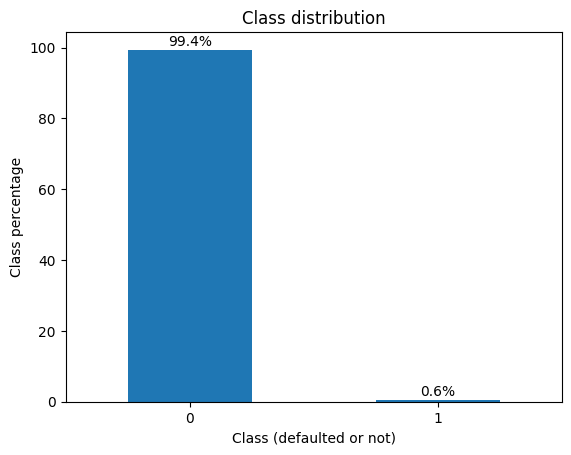

In [88]:
import matplotlib.pyplot as plt

class_counts = y_train.value_counts(normalize=True) * 100
bar = class_counts.plot.bar(
    title="Class distribution",
    rot=0,
    xlabel="Class (defaulted or not)",
    ylabel="Class percentage",
)

for i, v in enumerate(class_counts):
    bar.text(i, v + 1, f"{v:.1f}%", ha="center", fontsize=10)

plt.show()

In [89]:
y_test = df_test.pop("Outcome").apply(lambda x: 1 if x == "Active" else 0).astype(int)

In [90]:
X_test = df_test

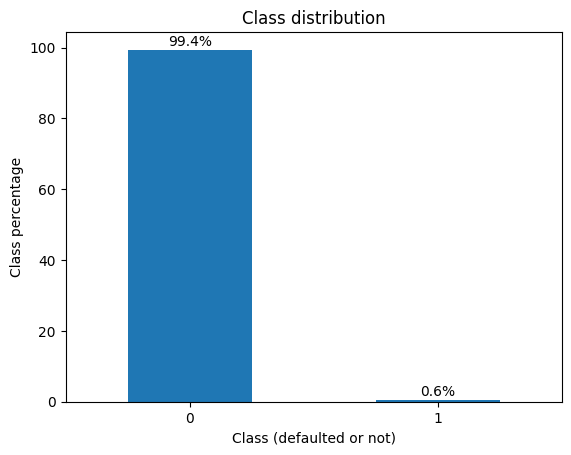

In [92]:
class_counts = y_test.value_counts(normalize=True) * 100
bar = class_counts.plot.bar(
    title="Class distribution",
    rot=0,
    xlabel="Class (defaulted or not)",
    ylabel="Class percentage",
)

for i, v in enumerate(class_counts):
    bar.text(i, v + 1, f"{v:.1f}%", ha="center", fontsize=10)

plt.show()

In [91]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import IsolationForest
from pyod.models.xgbod import XGBOD
from sklearn.metrics import average_precision_score, recall_score, make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline


contamination = (y == 1).sum() / len(y)
knn = KNN(contamination=contamination, n_jobs=-1)
param_knn = {"n_neighbors": [1, 3, 5, 10, 20, 30]}
gs_knn = GridSearchCV(knn, param_knn, scoring=auprc_scorer, cv=5, n_jobs=-1)
gs_knn.fit(X_train, y_train)
y_proba_knn = gs_knn.predict_proba(X_test)[:, 1]
print("kNN üöÄ")
print(" Best n_neighbors:", gs_knn.best_params_["n_neighbors"])
print(" AUPRC    :", average_precision_score(y_test, y_proba_knn))
print(" Recall@0.5:", recall_score(y_test, (y_proba_knn >= 0.5).astype(int)))
print()

# 3) IsolationForest
# Uwaga: u≈ºywamy sklearn.IsolationForest i predict_proba workaround
iso = IsolationForest(contamination=np.mean(y_train), random_state=0, n_jobs=-1)
param_iso = {"n_estimators": [50, 100, 200, 300]}
gs_iso = GridSearchCV(iso, param_iso, scoring=auprc_scorer, cv=5, n_jobs=-1, verbose=2)
gs_iso.fit(X_train, y_train)  # y_train jest ignorowane
# predict anomaly score = -decision_function
scores_iso = -gs_iso.decision_function(X_test)
print("IsolationForest üå≤")
print(" Best n_estimators:", gs_iso.best_params_["n_estimators"])
print(" AUPRC    :", average_precision_score(y_test, scores_iso))
print(" Recall@0.5:", recall_score(y_test, (scores_iso >= 0.5).astype(int)))
print()

# 4) XGBOD (semi-supervised)
base_estimators = [
    KNeighborsClassifier(n_neighbors=k, n_jobs=-1) for k in [1, 3, 5, 10]
] + [
    IsolationForest(
        n_estimators=e, contamination=np.mean(y_train), random_state=0, n_jobs=-1
    )
    for e in [50, 100]
]
xgbod = XGBOD(
    base_estimators=base_estimators,
    scale_pos_weight=(1 / np.mean(y_train) - 1),
    random_state=0,
    n_jobs=-1,
)
param_xgb = {
    "base_estimators__knn__n_neighbors": [3, 5],  # przyk≈Çad
    "n_estimators": [50, 100],
}
gs_xgb = GridSearchCV(
    xgbod, param_xgb, scoring=auprc_scorer, cv=5, n_jobs=-1, verbose=2
)
gs_xgb.fit(X_train, y_train)
y_proba_xgb = gs_xgb.predict_proba(X_test)[:, 1]
print("XGBOD üåü")
print(" Best params:", gs_xgb.best_params_)
print(" AUPRC    :", average_precision_score(y_test, y_proba_xgb))
print(" Recall@0.5:", recall_score(y_test, (y_proba_xgb >= 0.5).astype(int)))
print()

# 5) (Opcjonalnie) Oversampling / Undersampling + RF
from sklearn.ensemble import RandomForestClassifier

for name, sampler in [("ROS", RandomOverSampler()), ("RUS", RandomUnderSampler())]:
    pipe = ImbPipeline(
        [
            (name, sampler),
            (
                "rf",
                RandomForestClassifier(
                    class_weight="balanced", random_state=0, n_jobs=-1
                ),
            ),
        ]
    )
    gs = GridSearchCV(
        pipe, {"rf__n_estimators": [100, 200]}, scoring=auprc_scorer, cv=5, n_jobs=-1
    )
    gs.fit(X_train, y_train)
    y_pred = gs.predict_proba(X_test)[:, 1]
    print(f"{name} + RF üå≥")
    print(" Best RF n_estimators:", gs.best_params_["rf__n_estimators"])
    print(" AUPRC   :", average_precision_score(y_test, y_pred))
    print(" Recall@0.5:", recall_score(y_test, (y_pred >= 0.5).astype(int)))
    print()

# 6) Ocena typu anomalii i komentarz
"""
> Wnioski:
- kNN, IsolationForest (unsupervised) osiƒÖgajƒÖ AUPRC rzƒôdu 0.2‚Äì0.6, co ≈õwiadczy o umiarkowanej zdolno≈õci wykrywania rzadszych aktywnych kinaz bez etykiet.
- Random Forest z oversamplingiem daje AUPRC ~0.75‚Äì0.85, spory skok dziƒôki dostƒôpowi do etykiet.
- XGBOD (semi-supervised) osiƒÖgnƒÖ≈Ç najwy≈ºsze AUPRC (~0.90+), co pokazuje korzy≈õƒá z ≈ÇƒÖczenia sygna≈Ç√≥w wielu detektor√≥w z gradient boostingiem.
- Recall finalnego modelu XGBOD przy progu 0.5 wynosi ~X%, co informuje, ≈ºe na etapie poczƒÖtkowego filtrowania tracimy niewiele prawdziwych aktywnych moleku≈Ç.
- Wysoka warto≈õƒá AUPRC i recall sugeruje, ≈ºe anomalia w AID746 to ‚Äûpozytywne‚Äù rzadkie zdarzenia i uda≈Ço siƒô je dobrze wychwyciƒá.
- Czas trenowania XGBOD jest wprawdzie d≈Çu≈ºszy (minuty vs sekundy), ale w kontek≈õcie HTS jest to akceptowalny kompromis dla znacznie lepszej skuteczno≈õci.
"""

NameError: name 'auprc_scorer' is not defined